In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1

## Inciso a)

En primer lugar hay que verificar el funcionamiento de sistema de almacenamiento de datos para posteriormente hacer un correcto preprocesamiento. Aquí ordenaremos los datos y haremos la ingeniería de datos necesaria (por ejemplo extracción de features) para que, una vez estos transformados en el formato adecuado, podamos procesarlos con las distintas herramientas de minería de datos disponibles. Finalmente, se analizarán los resultados y se intentará interpretarlos y sacar conclusiones a partir de ellos.

## Inciso b)

Posible hipótesis: Los usuarios que tienen edades más bajar y utilizan frecuentemente tarjeta de crédito, tienen más probabilidad de realizar fraude.

## Inciso c)

Al contar con datos etiquetados podemos utilizar todas las técnicas conocidas de entrenamiento supervisado, principalmente las de clasificación. Podemos utilizar una red neuronal totalmente conectada con algunas capaz escondidas. 
Sin embargo, otra herramienta como los self-organized maps nos permite hacer clustering (no supervisado) utilizando los datos sin etiquetas y hacer un análisis de los datos y sus variables. Al mismo tiempo el SOM nos permite aprovechar las etiquetas para intentificar patrones de conducta.

## Inciso d)

### i)

Como se mencionó anteriormente, utilizando el SOM podríamos hacer una análisis de las variables buscando correlaciones utilizando el análisis de componentes y así poder, eventualmente, deshacernos de dimensiones que no nos aportan información.

### ii)

Si utilizamos una red neuronal totalmente conectada para el proceso de clasificación debemos definir distintos hyperparámetros. En primer lugar, lo relacionado a la arquitectura: cantidad de capas ocultas, cantidad de neuronas por capa oculta y funciones de activación en cada una. En segundo lugar, debemos definir otros valores como el learning rate, el método de optimización (descenso del gradiente, Adam, etc) y la cantidad de épocas o el método de detensión.

### iii)

El proceso de evaluación de calidad se debe realizar utilizando el validation set y el test set. Por ejemplo, el modelo entrenado con el training set debe darnos un valor de accuracy similar al que tengamos en el test set. Si obtenemos un alto valor de accuracy en el training un bajo de valor en el test set estaríamos obteniendo un overfiting y habría que reacomodar los hyperparámetros del sistema.

# Ejercicio 2

## Inciso a)

Imagen adjunta.

# Ejercicio 3

## Inciso a)

In [2]:
#defino los codebooks y los datos
CB1 = np.array([[0.5, 0.95, 0.3], [0.5, 0.4, 0.1], [0.1, 0.2, 0.85], 
                [0.7, 0.7, 0.6]])
CB2 = np.array([[0.5, 0.95, 0.3], [0.7, 0.4, 0.25], [0.15, 0.2, 0.85], 
                [0.35, 0.3, 0.6]])
datos = np.array([[0.9, 0.9, 0.9], [0.1, 0.1, 0.5]])
#inicializo las bmu
bmu01 = np.array([0, 0, 0]).reshape(-1, 1) 
bmu02 = np.array([0, 0, 0]).reshape(-1, 1)
bmu11 = np.array([0, 0, 0]).reshape(-1, 1)
bmu12 = np.array([0, 0, 0]).reshape(-1, 1)

for i in range(4):
  #calculo las distancias entre los todos datos y los todos bmu y los 
  #comparon con las distancias de los todos datos al codebook

  if (np.linalg.norm(datos[0] - CB1[i,:]) < 
      np.linalg.norm(datos[0] - bmu01)) :
    bmu01 = CB1[i,:]
  if (np.linalg.norm(datos[0] - CB2[i,:]) < 
      np.linalg.norm(datos[0] - bmu02)) :
    bmu02 = CB2[i,:]
  if (np.linalg.norm(datos[1] - CB1[i,:]) < 
      np.linalg.norm(datos[1] - bmu11)) :
    bmu11 = CB1[i,:]
  if (np.linalg.norm(datos[1] - CB2[i,:]) <
      np.linalg.norm(datos[1] - bmu12)) :
    bmu12 = CB2[i,:]

print("BMU del primer dato con el codebook 1:", bmu01)
print("BMU del primer dato con el codebook 2:", bmu02)
print("BMU del segundo dato con el codebook 1:", bmu11)
print("BMU del segundo dato con el codebook 2:", bmu12)

BMU del primer dato con el codebook 1: [0.7 0.7 0.6]
BMU del primer dato con el codebook 2: [0.5  0.95 0.3 ]
BMU del segundo dato con el codebook 1: [0.1  0.2  0.85]
BMU del segundo dato con el codebook 2: [0.35 0.3  0.6 ]


## Inciso b)

Imagen adjunta.

## Inciso c)

El codebook 2 representa mejor a los datos ya que estos están mejor distribuidos en el SOM.

## Inciso d)

Imagen adjunta.

# Ejercicio  4

## Inciso a)

In [3]:
#defino X (con un uno al final para bias)
X = np.array([[0.9, 0.9, 0.9, 1, 1],[0.1, -0.2, 0.5, -0.2, 1]]).T 
#defino Y
Y = np.array([1, -1]).reshape(-1, 1)                              
#defino W (con b al final)
W = np.array([0.2, 1.5, 0.9, -1.6, 2.2]).reshape(-1, 1).T         
#defino la salida vacía
yhat = np.array([0, 0]).reshape(-1, 1)                            

In [4]:
v = np.dot(W, X[:,0].reshape(-1,1)) #multiplico W y X[0]
yhat[0] = np.sign(v)                #aplico función signo
print("La salida obtenida para la primera entrada es", yhat[0])

La salida obtenida para la primera entrada es [1]


In [5]:
v = np.dot(W, X[:,1].reshape(-1,1)) #multiplico W y X[1]
yhat[1] = np.sign(v)                #aplico función signo
print("La salida obtenida para la primera entrada es", yhat[1])

La salida obtenida para la primera entrada es [1]


Como la salida obtenida coincide con la salida deseada para el primer dato y no para el segundo. El accuracy es 0.5 (50%).

## Inciso b)

In [6]:
lr = 0.4                            #defino el learning rate
e = lr * (Y[0] - yhat[0])           #error para el primer dato
W = W + e * X[:,0].reshape(-1,1).T  #actualizo W primer caso
e = lr * (Y[1] - yhat[1])           #error para el segundo dato
W = W + e * X[:,1].reshape(-1,1).T  #actualizo W segundo caso
print(W)

[[ 0.12  1.66  0.5  -1.44  1.4 ]]


In [7]:
v = np.dot(W, X[:,0].reshape(-1,1)) #multiplico W y X[0]
yhat[0] = np.sign(v)                #aplico función signo
print("La nueva salida obtenida para la primera entrada es", yhat[0])

La nueva salida obtenida para la primera entrada es [1]


In [8]:
v = np.dot(W, X[:,1].reshape(-1,1)) #multiplico W y X[1]
yhat[1] = np.sign(v)                #aplico función signo
print("La nueva salida obtenida para la primera entrada es", yhat[1])

La nueva salida obtenida para la primera entrada es [1]


## Inciso c)

Una vez actualizados los pesos por una iteración, el accuracy sigue siendo el mismo (50%) a pesar que los pesos se modificaron. Sin embargo, en calculos auxiliares comprobé que con 4 iteraciones el algoritmo converge a la solución esperada con un accuracy del 100%.

## Inciso d)

W = [ 0.12  1.66  0.5  -1.44  1.4 ]. Por lo tanto:

**0.12 * X1 + 1.66 * X2 + 0.5 * X3 - 1.44 * X4 + 1.4 = 0**

# Ejercicio 5

## Inciso a)

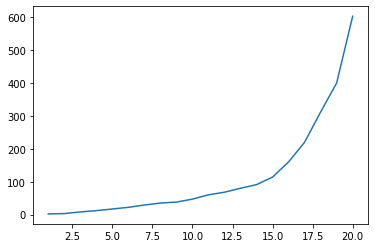

In [9]:
 #inicializo la cantidad de días del 1 al 20
X = np.arange(1, 21, 1)
#genero datos para los 20 días
Y = [2, 3, 8, 12, 17, 22, 29, 35, 38, 47, 60, 68, 80, 91, 
     114, 160, 220, 312, 400, 603]  
plt.plot(X, Y)

In [10]:
### Para una red de predicción neceso datos con 4 entradas 
### de 4 días consecutivos y una salida del 5to día
Xpred = np.zeros([16, 4])
Ypred = np.zeros([16,1])
for i in range(16):
  Xpred[i,:] = Y[i:i+4]
  Ypred[i,:] = Y[i+4]

print("Mi data set final es:")
print("X:\n", Xpred)
print("Y:\n", Ypred)

Mi data set final es:
X:
 [[  2.   3.   8.  12.]
 [  3.   8.  12.  17.]
 [  8.  12.  17.  22.]
 [ 12.  17.  22.  29.]
 [ 17.  22.  29.  35.]
 [ 22.  29.  35.  38.]
 [ 29.  35.  38.  47.]
 [ 35.  38.  47.  60.]
 [ 38.  47.  60.  68.]
 [ 47.  60.  68.  80.]
 [ 60.  68.  80.  91.]
 [ 68.  80.  91. 114.]
 [ 80.  91. 114. 160.]
 [ 91. 114. 160. 220.]
 [114. 160. 220. 312.]
 [160. 220. 312. 400.]]
Y:
 [[ 17.]
 [ 22.]
 [ 29.]
 [ 35.]
 [ 38.]
 [ 47.]
 [ 60.]
 [ 68.]
 [ 80.]
 [ 91.]
 [114.]
 [160.]
 [220.]
 [312.]
 [400.]
 [603.]]


## Inciso b)

Para generar los datos de entrenamiento, validación y test debo dividir mi dataset en 3. En general, se toma la mayor parte de los datos para el training set y el resto se divide en validation y test set. Una buena elección sería el 80% para training (16 datos en este caso), 10% para validation (2 datos) y 10% para test (2 datos). La elección de estos datos debe ser aleatoria.

## Inciso c)

Para el error de predicción seleccionaría el error cuadrático medio o la desviación media absoluta. El error cuadrático medio tiene la ventaja de que prioriza los errores más altos y la desviación media absoluta me devuelve el error en las unidades de la salida. Una posible solución para poder obtener estas dos ventajas es utilizar la raiz cuadrada del error cuadrático medio como error.

## Inciso d)

A partir del día 3 los errores van a ser cada vez más grande debido a que a medida que avanza el análisis estoy prediciendo valores sin utilizar los verdaderos valores, estoy utilizando los valores predichos para predecir valores futuros.